In [1]:
import numpy as np
import sklearn
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
df.shape

(116039, 13)

In [4]:
df['pets_allowed'].unique()


array([1, 0], dtype=int64)

In [5]:
# using np.ceil to round to
df['baths']=df['baths'].apply(np.ceil)

In [6]:
df.head()

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1220,0,1232,2,2.0,0,0,0,0,3,4,10,1
1,1375,0,1232,2,2.0,0,0,0,0,4,4,10,1
2,870,0,890,2,1.0,0,0,0,0,4,1,13,1
3,1800,1,2600,4,3.0,1,0,0,0,3,0,10,1
4,2640,2,982,2,2.0,0,1,0,0,4,2,34,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116039 entries, 0 to 116038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    116039 non-null  int64  
 1   type                     116039 non-null  int64  
 2   sqfeet                   116039 non-null  int64  
 3   beds                     116039 non-null  int64  
 4   baths                    116039 non-null  float64
 5   smoking_allowed          116039 non-null  int64  
 6   wheelchair_access        116039 non-null  int64  
 7   electric_vehicle_charge  116039 non-null  int64  
 8   comes_furnished          116039 non-null  int64  
 9   laundry_options          116039 non-null  int64  
 10  parking_options          116039 non-null  int64  
 11  state                    116039 non-null  int64  
 12  pets_allowed             116039 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 11.5 MB


In [8]:
x_data = df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features
x_data.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,1220,1232,2,2.0,0,0,0,0,3,4,10
1,1375,1232,2,2.0,0,0,0,0,4,4,10
2,870,890,2,1.0,0,0,0,0,4,1,13
3,1800,2600,4,3.0,1,0,0,0,3,0,10
4,2640,982,2,2.0,0,1,0,0,4,2,34


In [9]:
y_data = df['pets_allowed']

In [10]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access','electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state'])
df.head()

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1220,0,1232,2,2.0,0,0,0,0,3,4,10,1
1,1375,0,1232,2,2.0,0,0,0,0,4,4,10,1
2,870,0,890,2,1.0,0,0,0,0,4,1,13,1
3,1800,1,2600,4,3.0,1,0,0,0,3,0,10,1
4,2640,2,982,2,2.0,0,1,0,0,4,2,34,1


In [11]:
#Splitting the data set into Train set & Test set
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.25, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [12]:
X_test.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
77188,5.147550e-07,0.000119,0.25,0.250,1.0,0.0,0.0,0.0,0.25,0.666667,0.148148
115641,5.906136e-07,0.000057,0.00,0.125,0.0,1.0,1.0,0.0,1.00,0.000000,1.000000
100123,2.438313e-07,0.000094,0.25,0.125,1.0,0.0,0.0,0.0,0.25,0.666667,0.629630
79518,6.845338e-07,0.000194,0.50,0.500,0.0,0.0,0.0,0.0,1.00,0.000000,0.481481
47297,2.344393e-07,0.000117,0.25,0.125,1.0,0.0,0.0,0.0,0.00,0.166667,0.444444


In [13]:
#the scaler model

scaler = StandardScaler()

#fitting and standardization

train_scaled = scaler.fit_transform(X_train)

test_scaled = scaler.transform(X_test)

In [14]:
#to store rmse values for different k
rmse_val = []
#try running from k=1 through 20 and record testing accuracy
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    #fit the model
    model.fit(X_train, y_train) 

    #make prediction on test set
    pred=model.predict(X_test)

    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 

    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 0.34644996276185464
RMSE value for k =  2 is : 0.3208136630687387
RMSE value for k =  3 is : 0.3149230527703361
RMSE value for k =  4 is : 0.3137415014759167
RMSE value for k =  5 is : 0.3140839725506029
RMSE value for k =  6 is : 0.3147618649047235
RMSE value for k =  7 is : 0.3165423934856635
RMSE value for k =  8 is : 0.31818975729540333
RMSE value for k =  9 is : 0.31918403742512064
RMSE value for k =  10 is : 0.3206169724447669
RMSE value for k =  11 is : 0.32178466702022146
RMSE value for k =  12 is : 0.32300847169565305
RMSE value for k =  13 is : 0.32447784773915206
RMSE value for k =  14 is : 0.32568746601241916
RMSE value for k =  15 is : 0.32674026658464633
RMSE value for k =  16 is : 0.3277114736766436
RMSE value for k =  17 is : 0.32877158485416647
RMSE value for k =  18 is : 0.329723711786135
RMSE value for k =  19 is : 0.3306336249267029
RMSE value for k =  20 is : 0.33178263048532464


<AxesSubplot:>

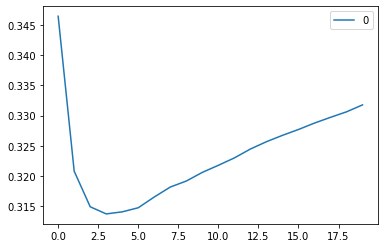

In [15]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [32]:
#Traiing
#Create KNN Classifier: k=0.314
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
#Prediction
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [35]:
#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy Rate : 86.98724577731817


In [36]:
#Import scikit-learn metrics module for accuracy calculation
#Calculate the confusion matrix, recall, percision and all over accuracy of the model
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[ 4290  2242]
 [ 1533 20945]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.69      6532
           1       0.90      0.93      0.92     22478

    accuracy                           0.87     29010
   macro avg       0.82      0.79      0.81     29010
weighted avg       0.87      0.87      0.87     29010

Accuracy Rate : 86.98724577731817


In [21]:
cf =confusion_matrix(y_pred, y_test, labels=[0,1])
print(confusion_matrix(y_pred, y_test, labels=[0,1]))

[[ 4290  1533]
 [ 2242 20945]]


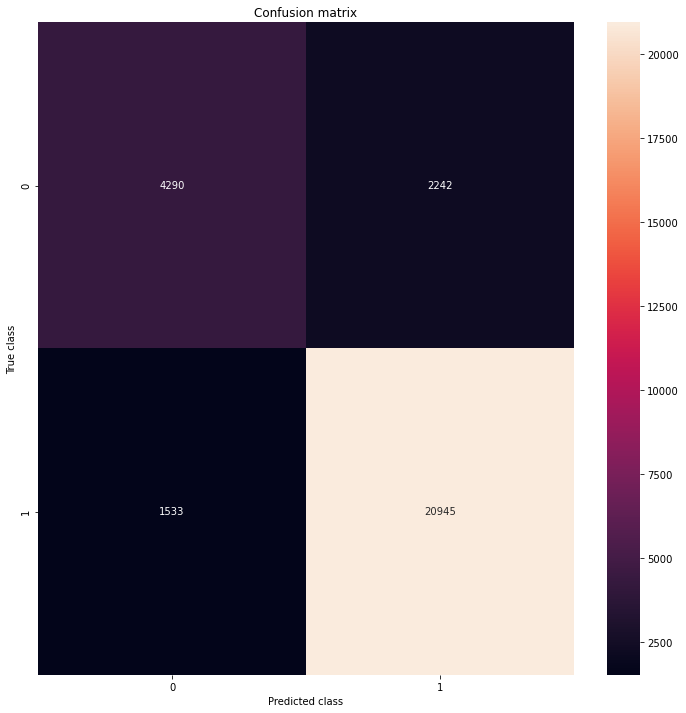

In [37]:
#confusion matrix creation
LABELS=['0','1']
conf_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



In [38]:
#Comparing Error rate with k-value
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

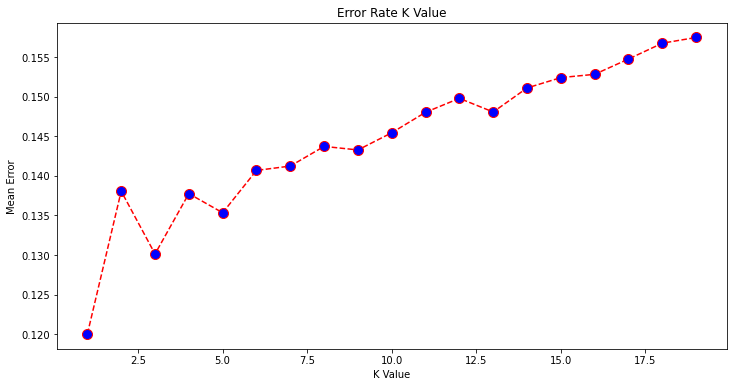

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')